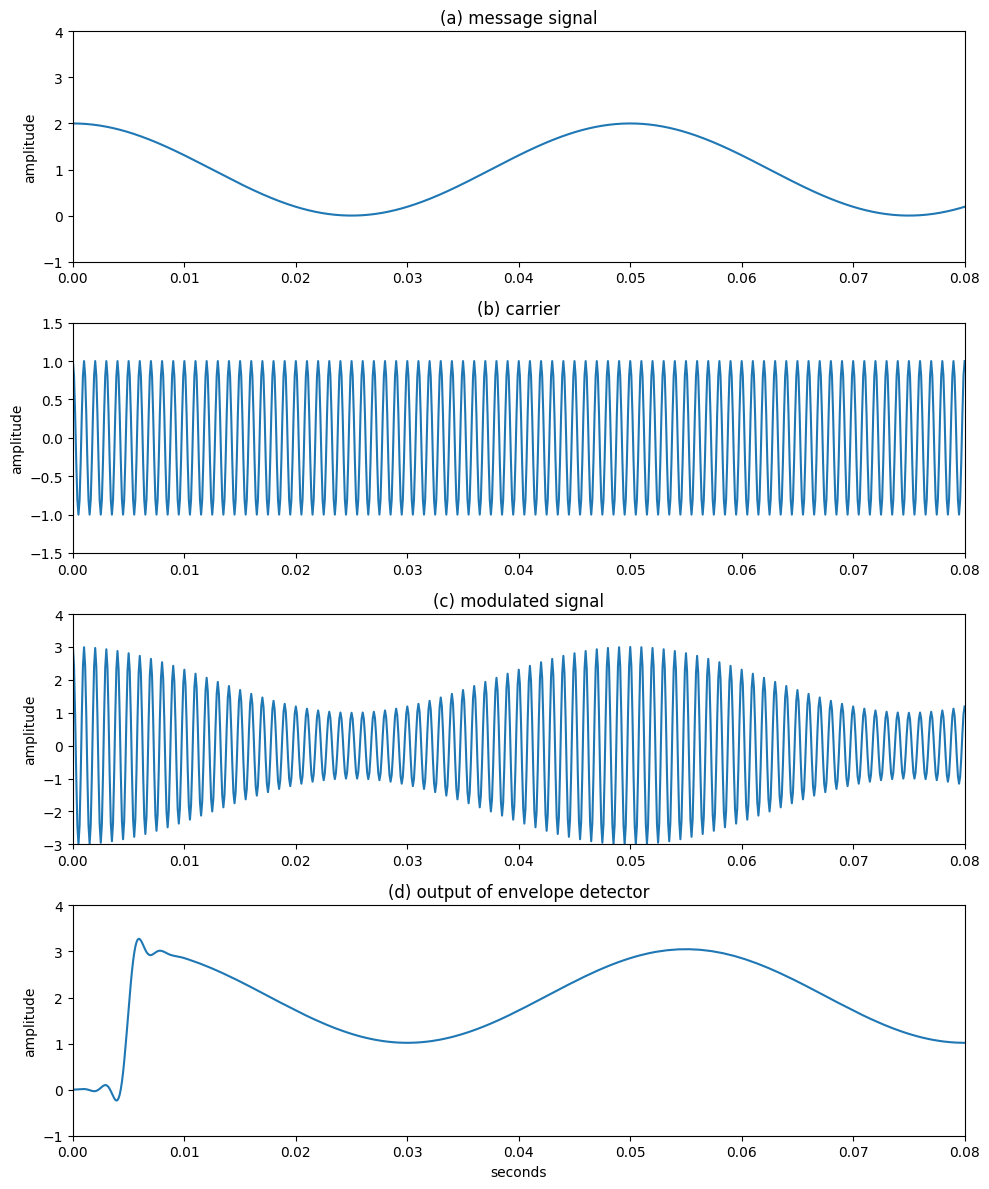

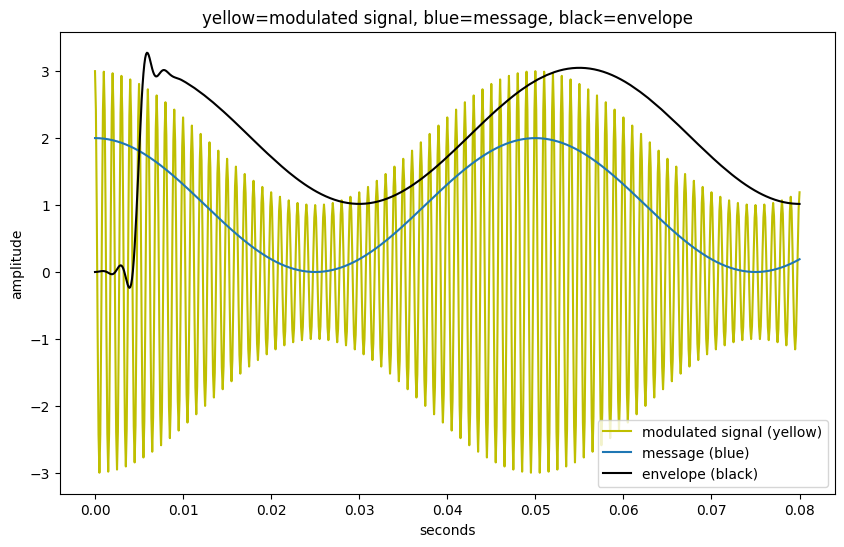

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Parâmetros de tempo e amostragem
time = 0.08  # duração do sinal
Ts = 1 / 10000  # intervalo de amostragem
t = np.arange(0, time + Ts, Ts)  # vetor de tempo
lent = len(t)  # comprimento do vetor de tempo

# Definição do portador (carrier)
fc = 1000
c = np.cos(2 * np.pi * fc * t)  # portadora na frequência fc

# Definição da mensagem (message)
fm = 20
w = 1 + np.cos(2 * np.pi * fm * t)  # mensagem (garantido que seja > -1)

# Modulação com portadora grande
v = c * w + c  # modulação com portadora grande

# Design do filtro passa-baixa
fbe = [0, 0.1, 0.2, 1]  # bordas da resposta em frequência normalizada
damps = [1, 1, 0, 0]  # resposta desejada (ganho)
fl = 100  # ordem do filtro
b = firwin(fl + 1, cutoff=0.1, window="hamming")  # resposta ao impulso do filtro

# Detector de envelope (filtro aplicado ao valor absoluto do sinal modulado)
envv = (np.pi / 2) * lfilter(b, 1, np.abs(v))

# Gerar a figura 1
plt.figure(1, figsize=(10, 12))

# (a) Sinal de mensagem
plt.subplot(4, 1, 1)
plt.plot(t, w)
plt.ylabel('amplitude')
plt.title('(a) message signal')
plt.axis([0, 0.08, -1, 4])

# (b) Portadora
plt.subplot(4, 1, 2)
plt.plot(t, c)
plt.ylabel('amplitude')
plt.title('(b) carrier')
plt.axis([0, 0.08, -1.5, 1.5])

# (c) Sinal modulado
plt.subplot(4, 1, 3)
plt.plot(t, v)
plt.ylabel('amplitude')
plt.title('(c) modulated signal')
plt.axis([0, 0.08, -3, 4])

# (d) Saída do detector de envelope
plt.subplot(4, 1, 4)
plt.plot(t, envv)
plt.ylabel('amplitude')
plt.title('(d) output of envelope detector')
plt.axis([0, 0.08, -1, 4])
plt.xlabel('seconds')

plt.tight_layout()
plt.show()

# Gerar a figura 2
plt.figure(2, figsize=(10, 6))
plt.plot(t, v, 'y', label='modulated signal (yellow)')
plt.plot(t, w, label='message (blue)')
plt.plot(t, envv, 'k', label='envelope (black)')
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.title('yellow=modulated signal, blue=message, black=envelope')
plt.legend()
plt.show()
